In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [10]:
data = []
with open('data_out.txt') as d:
    for line in d.readlines():
        raw = line.split()
        data.append([int(raw[0]) + 1, int(raw[1])])
data = np.array(data)
x_size = len(data)

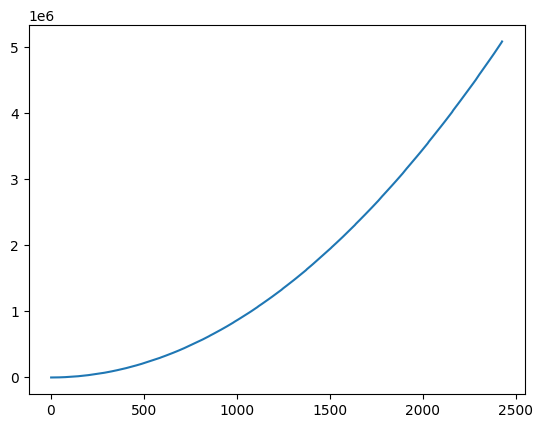

In [11]:
plt.plot(data[:,0], data[:,1])

In [12]:
diffs = [data[:,1]]
prev = diffs[0]
for _ in range(10):
    new_diff = []
    for i in range(len(prev)-1):
        new_diff.append( prev[i+1] - prev[i])
    diffs.append(new_diff)

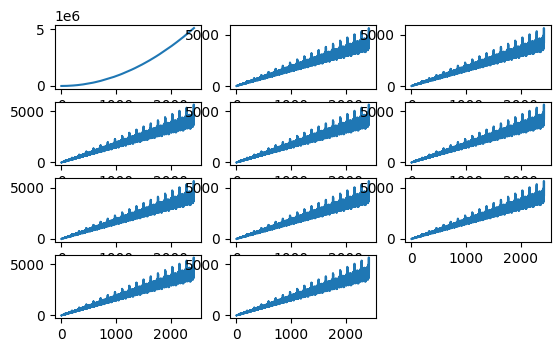

In [13]:
for (i, diff) in enumerate(diffs):
    plt.subplot(5,3,i+1)
    plt.plot(diff)


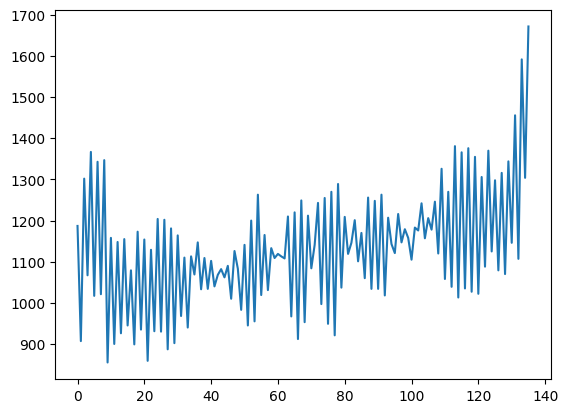

In [46]:
plt.plot(diffs[1][582:718])

0 [200, 249, 206, 249, 207, 232, 199, 251, 205, 248, 188, 242, 200, 259, 199, 258, 190, 253, 193, 247, 207, 236, 200, 235, 227, 241, 218, 232, 218, 231, 218, 223, 225, 222, 225, 211, 233, 225, 203, 236, 194, 247, 196, 260, 208, 239, 211, 231, 226, 227, 226, 224, 246, 195, 247, 183, 252, 191, 243, 217, 228, 248, 199, 249, 189, 251, 183, 254, 205, 238, 221, 225, 236, 215, 229, 207, 245, 201, 243, 202, 245, 197, 233, 222, 215, 235, 220, 227, 222, 212, 226, 224, 237, 220, 230, 223, 237, 211, 251, 199, 240, 195, 260, 190, 256, 195, 257, 193, 253, 190, 243, 200, 257, 206, 242, 198, 246, 195, 249, 208, 269, 200, 290, 237, 305, 226, 298, 226, 298, 192, 252] [200, 249, 206, 249, 207, 232, 199, 251, 205, 248, 188, 242, 200, 259, 199, 258, 190, 253, 193, 247, 207, 236, 200, 235, 227, 241, 218, 232, 218, 231, 218, 223, 225, 222, 225, 211, 233, 225, 203, 236, 194, 247, 196, 260, 208, 239, 211, 231, 226, 227, 226, 224, 246, 195, 247, 183, 252, 191, 243, 217, 228, 248, 199, 249, 189, 251, 183, 254, 2

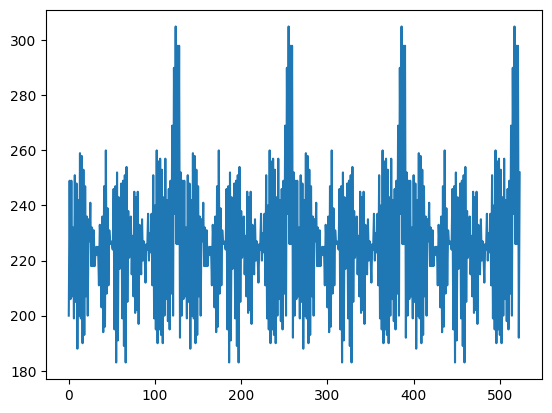

In [54]:
period_start = 200
dy = diffs[1]
def find_period_size(start, end):
    for ps in range(start, end+1):
        i = ps
        period_diffs = []
        while i < len(dy) - ps:
            period_diffs.append(dy[i + ps] - dy[i])
            i += 1
        period = period_diffs[period_start:period_start+ps]
        test_period_2 = period_diffs[period_start+3*ps:period_start+4*ps]
        s = np.sum(np.subtract(test_period_2,period))
        if s == 0:
            return ps
    print("not found in range!")

period_size = find_period_size(100,200)
i = period_size
period_diffs = []
while i < len(dy) - period_size:
    period_diffs.append(dy[i + period_size] - dy[i])
    i += 1
plt.plot(period_diffs[period_start:period_start+4*period_size])
period = period_diffs[period_start:period_start+period_size]
test_period_2 = period_diffs[period_start+10*period_size:period_start+11*period_size]
print(np.sum(np.subtract(test_period_2,period)), period, test_period_2)

[-200 -249 -206 -249 -207 -232 -199 -251 -205 -248 -188 -242 -200 -259
 -199 -258 -190 -253 -193 -247 -207 -236 -200 -235 -227 -241 -218 -232
 -218 -231 -218 -223 -225 -222 -225 -211 -233 -225 -203 -236 -194 -247
 -196 -260 -208 -239 -211 -231 -226 -227 -226 -224 -246 -195 -247 -183
 -252 -191 -243 -217 -228 -248 -199 -249 -189 -251 -183 -254 -205 -238
 -221 -225 -236 -215 -229 -207 -245 -201 -243 -202 -245 -197 -233 -222
 -215 -235 -220 -227 -222 -212 -226 -224 -237 -220 -230 -223 -237 -211
 -251 -199 -240 -195 -260 -190 -256 -195 -257 -193 -253 -190 -243 -200
 -257 -206 -242 -198 -246 -195 -249 -208 -269 -200 -290 -237 -305 -226
 -298 -226 -298 -192 -252]


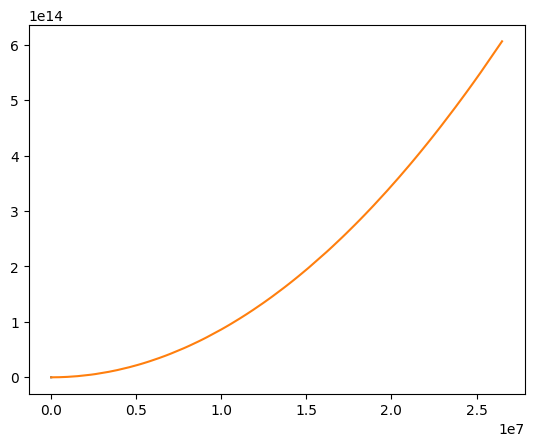

In [59]:
dy_window = dy[period_start:period_start+period_size]
print(np.subtract(dy_window, dy[period_start+period_size:period_start+2*period_size]))
ys_predicted = [0 for _ in range(period_start)]
ys_predicted.append(data[period_start,1])
for i in range(period_start, 26501365):
    w = (i-period_start) % period_size
    ys_predicted.append(ys_predicted[-1] + dy_window[w])
    dy_window[w] += period[w]

plt.plot(data[:,1])
plt.plot(ys_predicted)

In [60]:
print(ys_predicted[26501365 - 1])

606188414811259
